### GROUP MEMEBRS ROLL NUMBERS: 
- Abdul Raffay (CS-20094)
- Hamza Ahad Akhtar (CS-20101)
- Hunzala Mushtaq (CS-20052)

### A BRIEF OVERVIEW OF THE NOTEBOOK:
In this project we have done wheather forecasting by using various machine learning algorithms, for the training of all the models we have picked up an open source wheather dataset from kaggle.com 
The whole project is being done in two steps: 
- Data Pre-processing and Feature Engineering.
- Model Training

#### 1. WEATHER DATASET PREPROCESSING AND FEATURE ENGINEERING 🚀.

These will be the basic outline of steps that we'll be following in order clean and pre-process our data set:
1. Missing Values Treatment.
2. Outlier Treatment.
3. Redundant Columns Removal / Checking Co-relation.
4. Data Encoding or Data Split
5. Data Scaling (Normalization or Standardization)

In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import warnings
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
warnings.simplefilter('ignore')
sns.set_theme(style="dark")

#### STEP 1: Missing Values Treatment

In [65]:
def check_null_values(df):
    for column in df.columns.to_list():
        count = 0
        for isNullValue in df[column].isna().tolist():
            if isNullValue:
                count += 1
        if (count > 0):
            print(f'There are {count} null values in column {column}')

In [66]:
df = pd.read_csv('../data/weather.csv')
check_null_values(df)

There are 517 null values in column Precip Type


Hence dropping all those 517 rows which has null values in their **Precip Type** column

In [67]:
df_cleaned = df.dropna(subset=['Precip Type'])
check_null_values(df_cleaned)

In [68]:
def plot_blox_plot(df_cleaned):
    numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.to_list()
    # Set up the grid for the subplots
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

    # Iterate over the columns and plot box plots
    for i, column in enumerate(numerical_columns):
        row = i // 2
        col = i % 2
        sns.boxplot(x=df_cleaned[column], ax=axes[row, col])
        axes[row, col].set_xlabel(column)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


def plot_column_box_plot(column):
    sns.boxplot(x=df_cleaned[column])

#### STEP 2: Outlier Treatment

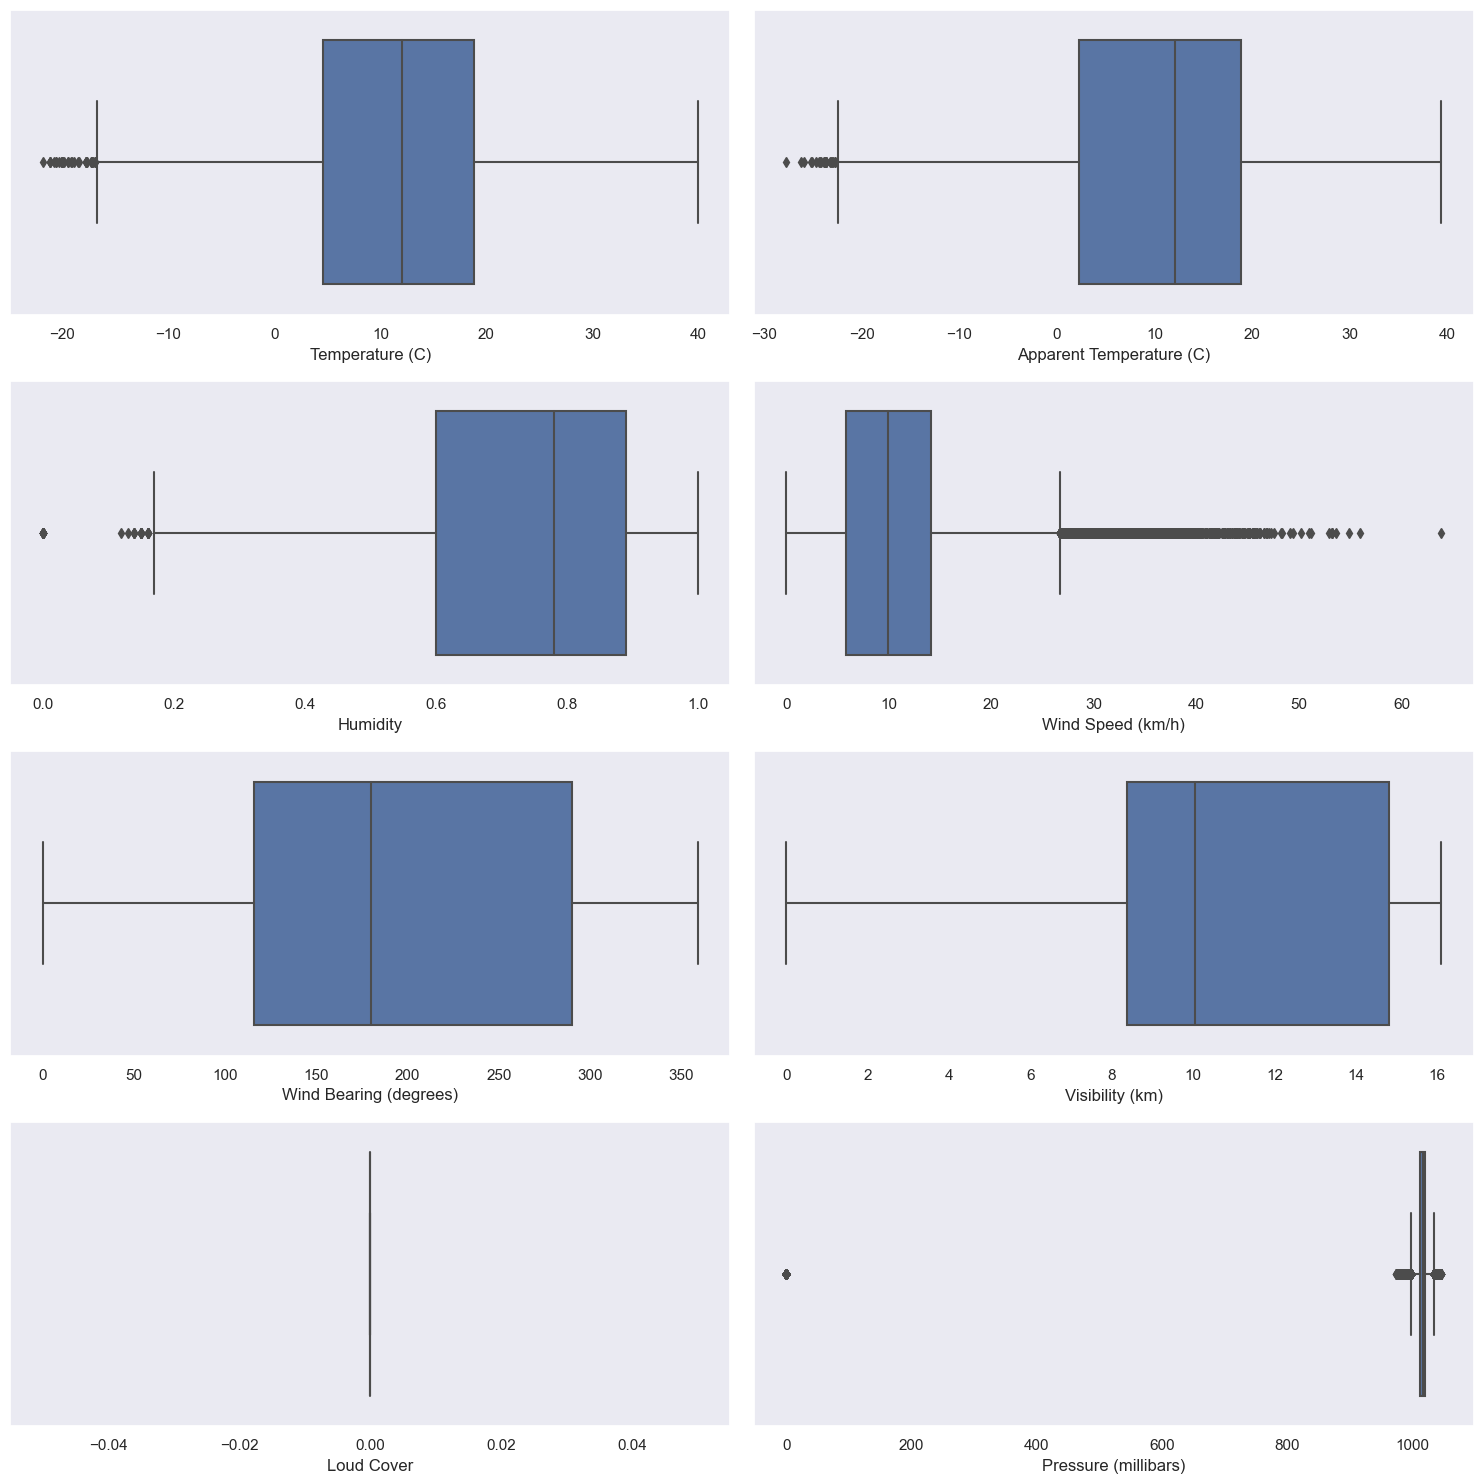

In [69]:
plot_blox_plot(df_cleaned)

In [70]:
numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.drop('Summary', errors='ignore').to_list()
numerical_columns

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

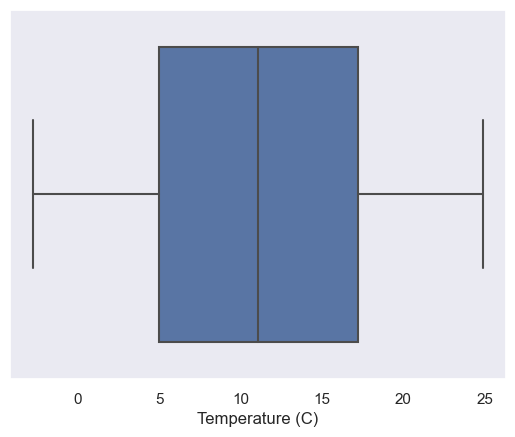

In [71]:
min_threshold, max_threshold = df_cleaned['Temperature (C)'].quantile([0.0500, 0.900])
df_cleaned = df_cleaned[(df_cleaned['Temperature (C)'] < max_threshold) & (df_cleaned['Temperature (C)'] > min_threshold)]
plot_column_box_plot('Temperature (C)')

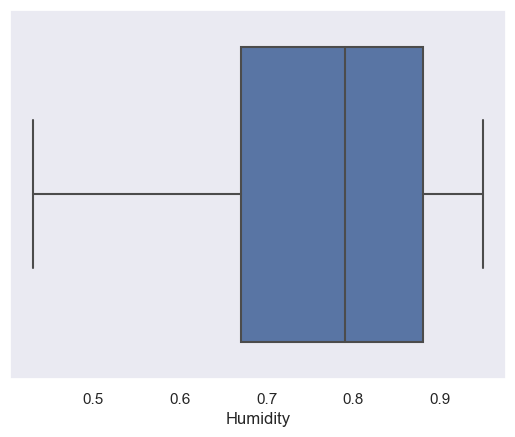

In [72]:
min_threshold, max_threshold = df_cleaned['Humidity'].quantile([0.0500, 0.900])
df_cleaned = df_cleaned[(df_cleaned['Humidity'] < max_threshold) & (df_cleaned['Humidity'] > min_threshold)]
plot_column_box_plot('Humidity')

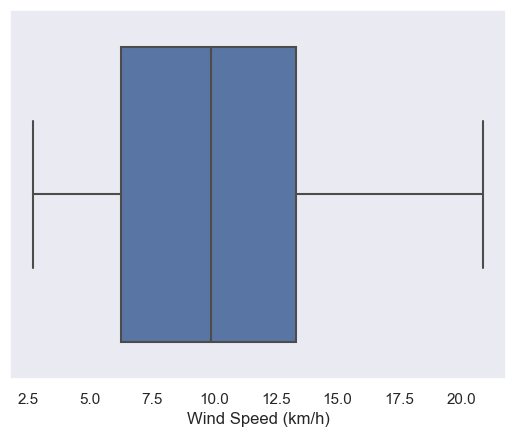

In [73]:
min_threshold, max_threshold = df_cleaned['Wind Speed (km/h)'].quantile([0.0500, 0.900])
df_cleaned = df_cleaned[(df_cleaned['Wind Speed (km/h)'] < max_threshold) & (df_cleaned['Wind Speed (km/h)'] > min_threshold)]
plot_column_box_plot('Wind Speed (km/h)')

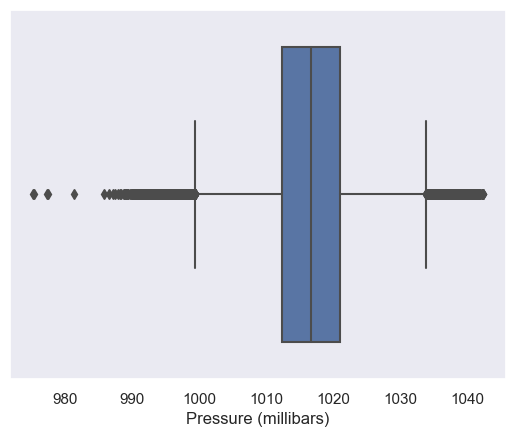

In [74]:
df_cleaned = df_cleaned[(df_cleaned['Pressure (millibars)'] != 0)]
plot_column_box_plot('Pressure (millibars)')

In [75]:
df_cleaned.shape

(57806, 12)

#### STEP 3: Redundant Columns Removal / Checking Co-Relation

In [76]:
# Finding the Co-relation matrix of the dataset so far.
non_numeric_columns = df_cleaned.select_dtypes(exclude=np.number).columns
df_numeric = df_cleaned.drop(non_numeric_columns, axis=1)
correlation_matrix = df_numeric.corr()
correlation_matrix

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.993356,-0.436118,-0.067092,0.010862,0.339184,NaN,-0.287559
Apparent Temperature (C),0.993356,1.000000,-0.419398,-0.130626,0.013867,0.333928,NaN,-0.268710
Humidity,-0.436118,-0.419398,1.000000,-0.170628,0.053025,-0.296848,NaN,-0.042816
Wind Speed (km/h),-0.067092,-0.130626,-0.170628,1.000000,0.018529,0.003875,NaN,-0.177986
Wind Bearing (degrees),0.010862,0.013867,0.053025,0.018529,1.000000,0.045711,NaN,-0.051539
Visibility (km),0.339184,0.333928,-0.296848,0.003875,0.045711,1.000000,NaN,-0.110652
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.287559,-0.268710,-0.042816,-0.177986,-0.051539,-0.110652,NaN,1.000000


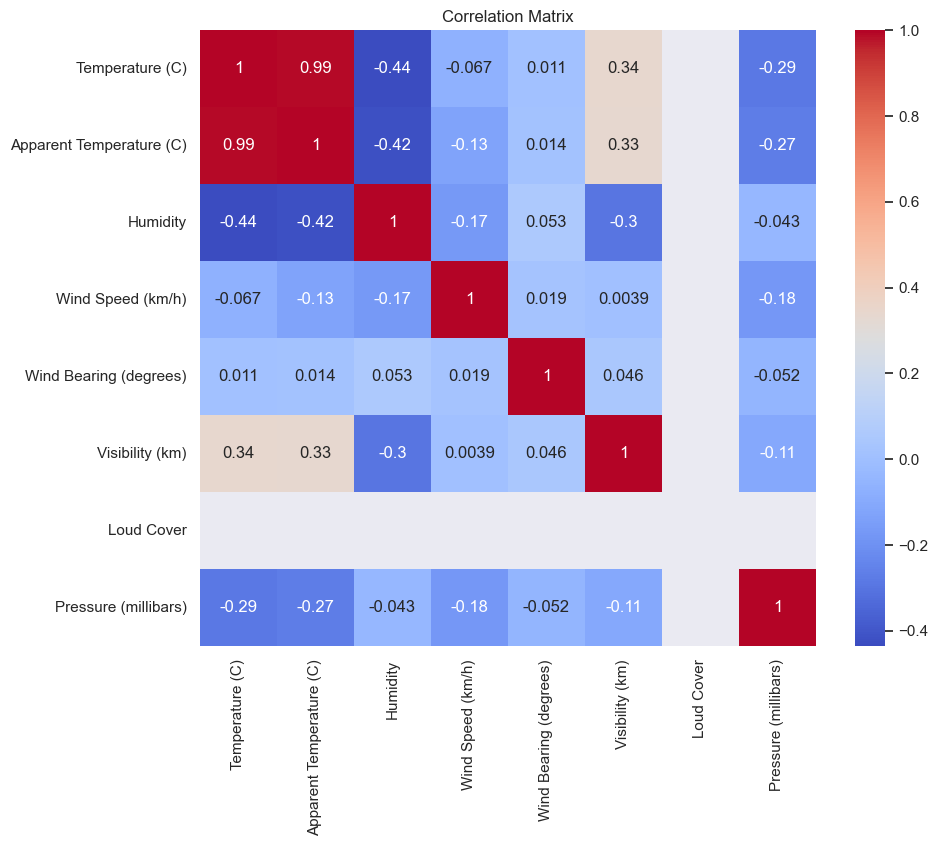

In [77]:
# Now Visualizing the Co-relation matrix as a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [78]:
# Finding the co-related columns by comparing them with a fixed threshold
threshold = 0.7
correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)

correlated_columns

{'Apparent Temperature (C)'}

In [79]:
# Removing the Co-related column 'Apparent Temperature (C)' from the cleaned dataset so far.
df_cleaned = df_cleaned.drop(correlated_columns, axis=1)
df_cleaned.shape

(57806, 11)

In [80]:
# Removing the "Daily Summary" and the "Loud Cover" Column as it has no such relevance. 
df_cleaned = df_cleaned.drop("Daily Summary", axis=1)
df_cleaned = df_cleaned.drop("Loud Cover", axis=1)
df_cleaned.shape

(57806, 9)

In [81]:
# Checking if there are any duplicate rows in the dataset, if yes then removing them up.
duplicate_rows = df_cleaned.duplicated()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.shape

(57804, 9)

#### STEP 4: Data Encoding or Data Split

In [82]:
# Selecting Only Three Classes and Removing the Rest of them.
df_cleaned['Summary'].value_counts()

Summary
Mostly Cloudy              19576
Partly Cloudy              18692
Overcast                   10965
Clear                       6605
Foggy                       1822
Light Rain                    53
Drizzle                       34
Humid and Mostly Cloudy       28
Humid and Partly Cloudy       16
Rain                           7
Humid and Overcast             6
Name: count, dtype: int64

In [83]:
# Taking the most suitable set of classes by trial and error i.e ('Overcast', 'Clear', and 'Foggy').
top_classes = ['Overcast', 'Clear', 'Foggy']
df_cleaned = df_cleaned[df_cleaned['Summary'].isin(top_classes)]
df_cleaned["Summary"].value_counts()

Summary
Overcast    10965
Clear        6605
Foggy        1822
Name: count, dtype: int64

In [84]:
# Seeing how many textual are there which need to be encoded
df_cleaned.select_dtypes(exclude=np.number).columns.to_list()

['Formatted Date', 'Summary', 'Precip Type']

In [85]:
df_cleaned['Summary'].unique()

array(['Overcast', 'Foggy', 'Clear'], dtype=object)

In [86]:
# First encoding the Target Attribute by Label Encoding Scheme.
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(df_cleaned['Summary'])
df_cleaned['Summary'] = encoded_column

# Get the mapping between numeric and textual values
mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for code, text in mapping.items():
    print(f"{text} --> {code}")

# df_cleaned.head()

Clear --> 0
Foggy --> 1
Overcast --> 2


In [87]:
df_cleaned['Summary'].unique()

array([2, 1, 0])

In [88]:
df_cleaned.select_dtypes(exclude=np.number).columns.to_list()

['Formatted Date', 'Precip Type']

In [89]:
# Checking the 'Precip Type' column to see which encoding technique to apply.
df_cleaned['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [90]:
# Encoding the "Precip Type" column using the Lable Encoder Technique as it has only two unique values.
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(df_cleaned['Precip Type'])
df_cleaned['Precip Type'] = encoded_column
# df_cleaned.head()

# Get the mapping between numeric and textual values
mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for code, text in mapping.items():
    print(f"{text} --> {code}")


rain --> 0
snow --> 1


In [91]:
# Checking the 'Formatted Date' column to see which encoding technique to apply.
df_cleaned['Formatted Date']

46       2006-04-10 22:00:00.000 +0200
47       2006-04-10 23:00:00.000 +0200
48       2006-04-11 00:00:00.000 +0200
49       2006-04-11 01:00:00.000 +0200
51       2006-04-11 03:00:00.000 +0200
                     ...              
96432    2016-09-09 03:00:00.000 +0200
96433    2016-09-09 04:00:00.000 +0200
96434    2016-09-09 05:00:00.000 +0200
96435    2016-09-09 06:00:00.000 +0200
96436    2016-09-09 07:00:00.000 +0200
Name: Formatted Date, Length: 19392, dtype: object

In [92]:
# Extracting useful pieces of information such as "Year", "Month", "Day" and "Hour" as separate columns from a single "Formatted Date" column and then encoding those four columns by Label Encoding.

# Instantiating the LabelEncoder Object.
label_encoder = LabelEncoder()

# Convert the "Formatted Date" column to datetime format
date_col = pd.to_datetime(df_cleaned['Formatted Date'], utc=True)

# Verify the data type of 'Formatted Date'
# print(df_cleaned['Formatted Date'].dtype)

# Extract datetime features
df_cleaned['Year'] = date_col.dt.year
df_cleaned['Month'] = date_col.dt.month
df_cleaned['Day'] = date_col.dt.day
df_cleaned['Hour'] = date_col.dt.hour

# Encode the extracted features using LabelEncoder
df_cleaned['Year'] = label_encoder.fit_transform(df_cleaned['Year'])
df_cleaned['Month'] = label_encoder.fit_transform(df_cleaned['Month'])
df_cleaned['Day'] = label_encoder.fit_transform(df_cleaned['Day'])
df_cleaned['Hour'] = label_encoder.fit_transform(df_cleaned['Hour'])

# Drop the original "Formatted Date" column
df_cleaned.drop('Formatted Date', axis=1, inplace=True)
# df_cleaned.head()

# Get the mapping between numeric and textual values
mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for code, text in mapping.items():
    print(f"{text} --> {code}")


0 --> 0
1 --> 1
2 --> 2
3 --> 3
4 --> 4
5 --> 5
6 --> 6
7 --> 7
8 --> 8
9 --> 9
10 --> 10
11 --> 11
12 --> 12
13 --> 13
14 --> 14
15 --> 15
16 --> 16
17 --> 17
18 --> 18
19 --> 19
20 --> 20
21 --> 21
22 --> 22
23 --> 23


In [93]:
df_cleaned.shape

(19392, 12)

In [94]:
y = df_cleaned['Summary']
input_dataframe = df_cleaned.drop(columns='Summary', axis=1)
X = input_dataframe.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [117]:
input_dataframe

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month,Day,Hour
46,0,14.422222,0.58,20.0123,159,15.8263,1007.85,0,3,9,20
47,0,14.255556,0.59,16.5025,168,14.9569,1007.89,0,3,9,21
48,0,13.772222,0.60,17.0982,160,15.8263,1007.36,0,3,9,22
49,0,13.283333,0.63,14.3612,160,15.8263,1007.26,0,3,9,23
51,0,11.250000,0.83,11.3344,152,15.8263,1007.01,0,3,10,1
...,...,...,...,...,...,...,...,...,...,...,...
96432,0,15.594444,0.87,3.2844,41,15.4399,1014.52,10,8,8,1
96433,0,15.011111,0.93,3.2039,341,15.8263,1014.37,10,8,8,2
96434,0,15.016667,0.90,2.7048,359,14.9569,1014.55,10,8,8,3
96435,0,13.872222,0.93,4.7495,0,15.8263,1014.66,10,8,8,4


#### STEP 5: Data Scaling (Normalization or Standardization)

In [95]:
# Applying scaling on the input feature set.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

#### 2. MODEL BUILDING 🚀.

##### i. PARAMETRIC ALGORITHMS MODEL BUILDING.

- Useful Handler Functions:.

Here are some useful handler functions that will perform the tasks like evaluating the trained model on various performance metrics like accuracy, f1-score, recall etc, and checking that if the model has gone underfitted or overfitted.

In [96]:
def check_underfit_or_overfit(y_train, y_train_pred, y_test, y_test_pred):
    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    if training_accuracy <= 0.65:
        print("Model is underfitting.")
    elif training_accuracy > 0.65 and abs(training_accuracy - testing_accuracy) > 0.15:
        print("Model is overfitting.")
    else:
        print("Model is not underfitting/overfitting.")


def find_performance_metrics(y_true, y_pred, algorithm):
    accuracy = round(accuracy_score(y_true, y_pred), 3)*100
    precision = round(precision_score(y_true, y_pred, average="weighted"), 3)
    recall = round(recall_score(y_true, y_pred, average="weighted"), 3)
    f1 = round(f1_score(y_true, y_pred, average="weighted"), 3)
    print("Algorithm: ", algorithm)
    print()
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    cm = confusion_matrix(y_true, y_pred)
    labels = ["Overcast", "Clear", "Foggy"]
    plt.figure(figsize=(10, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
    )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return accuracy, precision, recall, f1

- Logistic Regression Classifier

Best Parameters: {'C': 10.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}

Model is not underfitting/overfitting.
Algorithm:  Logistic Regression.

Accuracy: 80.4
Precision: 0.802
Recall: 0.804
F1 Score: 0.803



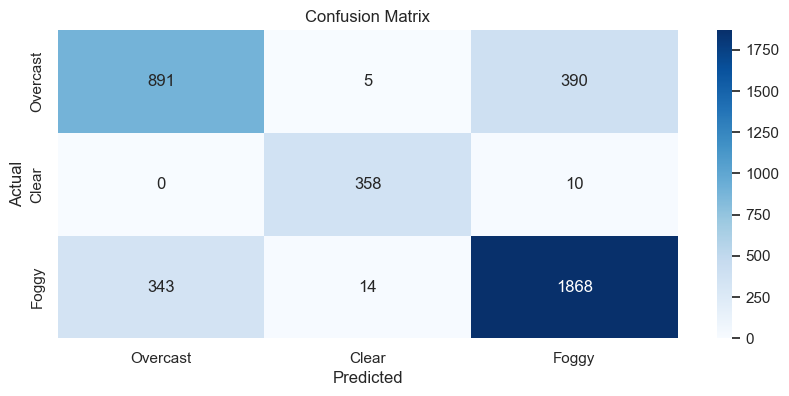

In [97]:
# Define the hyperparameters you want to search over
parameters = {
    "solver": ["liblinear", "saga"],
    "multi_class": ["ovr", "multinomial"],
    "C": [0.001, 0.01, 10.0],
    "penalty": ["l1", "l2"],
}

# Create a logistic regression model
logistic_regression = LogisticRegression(n_jobs=1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=parameters, cv=4)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}\n")

# Predictions for train data
best_model_logistic_regression = grid_search.best_estimator_

# Predictions for train data
y_pred_logistic_regression = best_model_logistic_regression.predict(x_train)

# Predictions for test data
y_pred_logistic_regression_new = best_model_logistic_regression.predict(x_test)

# Checking if the model is overfitting or underfitting
check_underfit_or_overfit(
    y_train, y_pred_logistic_regression, y_test, y_pred_logistic_regression_new
)

# Showing the performance metrics of Logistic Regression
(
    accuracy_logistic_regression,
    precision_logistic_regression,
    recall_logistic_regression,
    f1_logistic_regression,
) = find_performance_metrics(
    y_test, y_pred_logistic_regression_new, "Logistic Regression."
)

- Gaussian Naive Bayes Classifier

Best Parameters: {'var_smoothing': 1e-09}

Model is not underfitting/overfitting.
Algorithm:  Gaussian Naive Bayes.

Accuracy: 76.3
Precision: 0.765
Recall: 0.763
F1 Score: 0.763



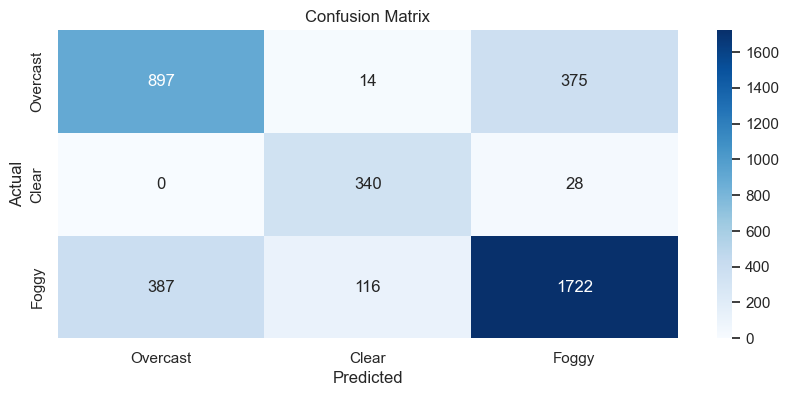

In [98]:
# Define the hyperparameters you want to search over
parameters = {"var_smoothing": [1e-9, 1e-8, 1e-10]}

# Create a gaussian nb model
gaussian_nb = GaussianNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gaussian_nb, param_grid=parameters, cv=4)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}\n")

# Predictions for train data
best_model_gaussian_nb = grid_search.best_estimator_

# Predictions for train data
y_pred_gaussian_nb = best_model_gaussian_nb.predict(x_train)

# Predictions for test data
y_pred_gaussian_nb_new = best_model_gaussian_nb.predict(x_test)

# Checking if the model is overfitting or underfitting
check_underfit_or_overfit(y_train, y_pred_gaussian_nb, y_test, y_pred_gaussian_nb_new)

# Showing the performance metrics of Logistic Regression
(
    accuracy_gaussian_nb,
    precision_gaussian_nb,
    recall_gaussian_nb,
    f1_gaussian_nb,
) = find_performance_metrics(y_test, y_pred_gaussian_nb_new, "Gaussian Naive Bayes.")

-  SGD Classifier

Best Parameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l1'}

Model is not underfitting/overfitting.
Algorithm:  SGD Classifier.

Accuracy: 79.10000000000001
Precision: 0.791
Recall: 0.791
F1 Score: 0.791



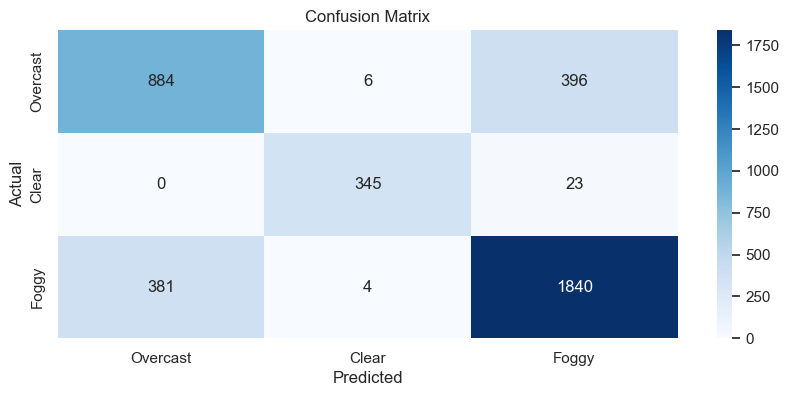

In [99]:
# Define the hyperparameters you want to search over
parameters = {'loss':['log_loss','perceptron','hinge','squared_epsilon_insensitive'],
              'penalty': ['l1', 'l2'],
              'alpha':[0.001,0.01,0.0001],
              'learning_rate':['optimal','adaptive','invscaling']}

# Create a SVM model
svm = SGDClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, cv=4)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}\n')

# Predictions for train data
best_model_sgd = grid_search.best_estimator_

# Predictions for train data
y_pred_sgd = best_model_sgd.predict(x_train)

# Predictions for test data
y_pred_sgd_new = best_model_sgd.predict(x_test)

# Checking if the model is overfitting or underfitting
check_underfit_or_overfit(y_train, y_pred_sgd, y_test, y_pred_sgd_new)

# Showing the performance metrics of Logistic Regression
(
    accuracy_sgd,
    precision_sgd,
    recall_sgd,
    f1_sgd,
) = find_performance_metrics(y_test, y_pred_sgd_new, "SGD Classifier.")

##### ii. NON-PARAMETRIC ALGORITHMS MODEL BUILDING.

- Decision Tree Classifier

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}

Model is not underfitting/overfitting.
Algorithm:  Decision Tree.

Accuracy: 88.2
Precision: 0.883
Recall: 0.882
F1 Score: 0.882



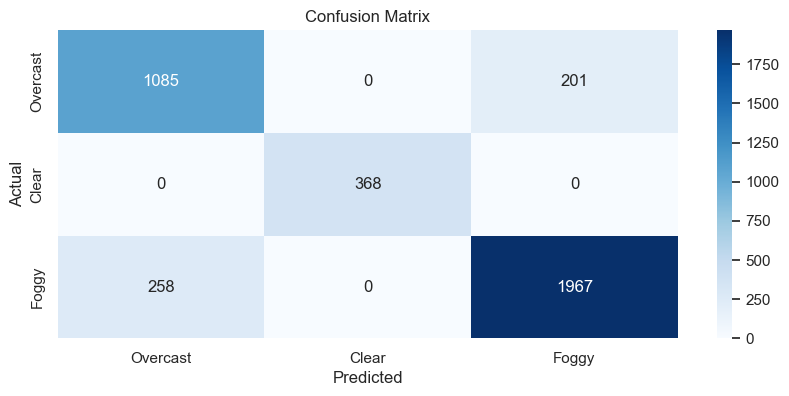

In [100]:
# Define the hyperparameters you want to search over
parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [None, 2, 5],
    "splitter": ["best", "random"],
}

# Create a DT model
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=4)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}\n")

# Predictions for train data
best_model_decision_tree = grid_search.best_estimator_

# Predictions for train data
y_pred_decision_tree = best_model_decision_tree.predict(x_train)

# Predictions for test data
y_pred_decision_tree_new = best_model_decision_tree.predict(x_test)

# Checking if the model is overfitting or underfitting
check_underfit_or_overfit(
    y_train, y_pred_decision_tree, y_test, y_pred_decision_tree_new
)

# Showing the performance metrics of Logistic Regression
(
    accuracy_decision_tree,
    precision_decision_tree,
    recall_decision_tree,
    f1_decision_tree,
) = find_performance_metrics(y_test, y_pred_decision_tree_new, "Decision Tree.")

- K Nearest Neighbours Classifier

Best Parameters: {'algorithm': 'auto', 'p': 1, 'weights': 'distance'}

Model is not underfitting/overfitting.
Algorithm:  K Nearest Neighbours Classifier.

Accuracy: 90.60000000000001
Precision: 0.906
Recall: 0.906
F1 Score: 0.906



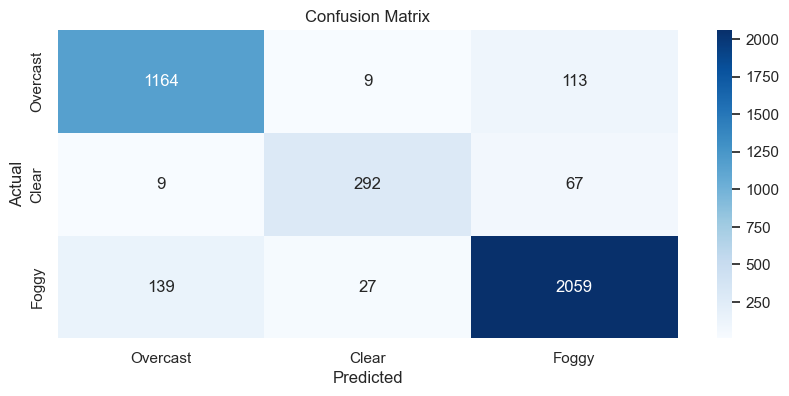

In [101]:
# Define the hyperparameters you want to search over
parameters = {
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=4)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}\n")

# Predictions for train data
best_model_KNN = grid_search.best_estimator_

# Predictions for train data
y_pred_KNN = best_model_KNN.predict(x_train)

# Predictions for test data
y_pred_KNN_new = best_model_KNN.predict(x_test)

# Checking if the model is overfitting or underfitting
check_underfit_or_overfit(y_train, y_pred_KNN, y_test, y_pred_KNN_new)

# Showing the performance metrics of Logistic Regression
(
    accuracy_KNN,
    precision_KNN,
    recall_KNN,
    f1_KNN,
) = find_performance_metrics(y_test, y_pred_KNN_new, "K Nearest Neighbours Classifier.")

- Random Forest Classifier

Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2}

Model is not underfitting/overfitting.
Algorithm:  Random Forest.

Accuracy: 92.2
Precision: 0.922
Recall: 0.922
F1 Score: 0.922



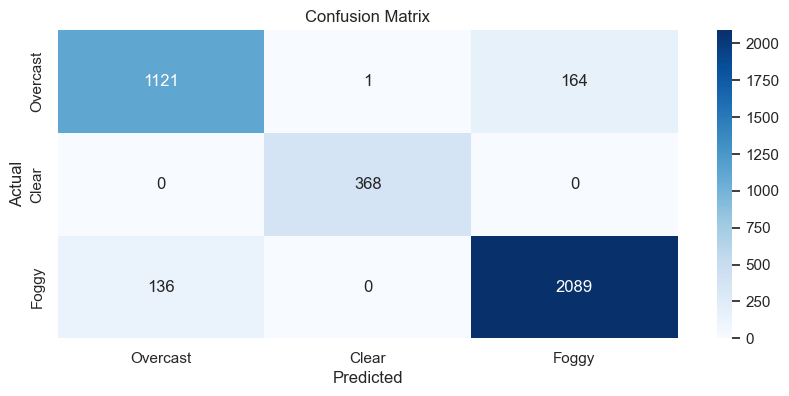

In [102]:
# Define the hyperparameters you want to search over
parameters = {
    "max_depth": [None, 5],
    "class_weight": [None, "balanced"],
    "min_samples_split": [None, 2, 5],
}

# Create a RF model
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=4)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}\n")

# Predictions for train data
best_model_random_forest = grid_search.best_estimator_

# Predictions for train data
y_pred_random_forest = best_model_random_forest.predict(x_train)

# Predictions for test data
y_pred_random_forest_new = best_model_random_forest.predict(x_test)

# Checking if the model is overfitting or underfitting
check_underfit_or_overfit(
    y_train, y_pred_random_forest, y_test, y_pred_random_forest_new
)

# Showing the performance metrics of Logistic Regression
(
    accuracy_random_forest,
    precision_random_forest,
    recall_random_forest,
    f1_random_forest,
) = find_performance_metrics(y_test, y_pred_random_forest_new, "Random Forest.")

In [103]:
# Results
print("Testing Performances for Machine Learning Algorithms")
result = pd.DataFrame(
    {
        "Algorithms": [
            "Logistic Regression",
            "Gaussian Naive Bayes",
            "SGD Classifier",
            "Decision Tree",
            "KNN",
            "Random Forest",
        ],
        "Accuracy": [
            accuracy_logistic_regression,
            accuracy_gaussian_nb,
            accuracy_sgd,
            accuracy_decision_tree,
            accuracy_KNN,
            accuracy_random_forest,
        ],
        "Precision": [
            precision_logistic_regression,
            precision_gaussian_nb,
            precision_sgd,
            precision_decision_tree,
            precision_KNN,
            precision_random_forest,
        ],
        "Recall": [
            recall_logistic_regression,
            recall_gaussian_nb,
            recall_sgd,
            recall_decision_tree,
            recall_KNN,
            recall_random_forest,
        ],
        "F1 Score": [
            f1_logistic_regression,
            f1_gaussian_nb,
            f1_sgd,
            f1_decision_tree,
            f1_KNN,
            f1_random_forest,
        ],
    }
).set_index("Algorithms")
result

Testing Performances for Machine Learning Algorithms


,Accuracy,Precision,Recall,F1 Score
Algorithms,,,,
Logistic Regression,80.4,0.802,0.804,0.803
Gaussian Naive Bayes,76.3,0.765,0.763,0.763
SGD Classifier,79.1,0.791,0.791,0.791
Decision Tree,88.2,0.883,0.882,0.882
KNN,90.6,0.906,0.906,0.906
Random Forest,92.2,0.922,0.922,0.922


In [104]:
# Saving sklearn machine learning models
models = [
    best_model_logistic_regression,
    best_model_gaussian_nb,
    best_model_sgd,
    best_model_decision_tree,
    best_model_KNN,
    best_model_random_forest,
]
names = [
    "logistic_regression",
    "gaussian_nb",
    "sgd",
    "decision_tree",
    "KNN",
    "random_forest",
]
for i in range(len(models)):
    joblib.dump(models[i], names[i] + ".pkl")

##### iii. ARTIFICIAL NEURAL NETWORK ALGORITHM MODEL BUILDING.

* ANN MODEL PRE-PROCESSING

In [105]:
# Hyperparameters for ANN & RNN
classes = 3
epochs = 250
input_shape= x_train.shape[1]
batch_size = 32
learning_rate = 0.01

In [106]:
# Converting labels to one-hot encoded format
y_train= tf.keras.utils.to_categorical(y_train, classes)
y_test = tf.keras.utils.to_categorical(y_test, classes)

- NEURAL NETWORK 1: 16-256 ANN with 'tanh'

Epoch 1/250
485/485 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7498 - val_loss: 0.4640 - val_accuracy: 0.7951
Epoch 2/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7794 - val_loss: 0.4486 - val_accuracy: 0.8025
Epoch 3/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.7908 - val_loss: 0.4326 - val_accuracy: 0.8134
Epoch 4/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.8018 - val_loss: 0.4010 - val_accuracy: 0.8221
Epoch 5/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.8033 - val_loss: 0.4193 - val_accuracy: 0.8172
Epoch 6/250
485/485 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8136 - val_loss: 0.3943 - val_accuracy: 0.8226
Epoch 7/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4077 - accuracy: 0.8159 - val_loss: 0.3900 - val_accuracy: 0.8332

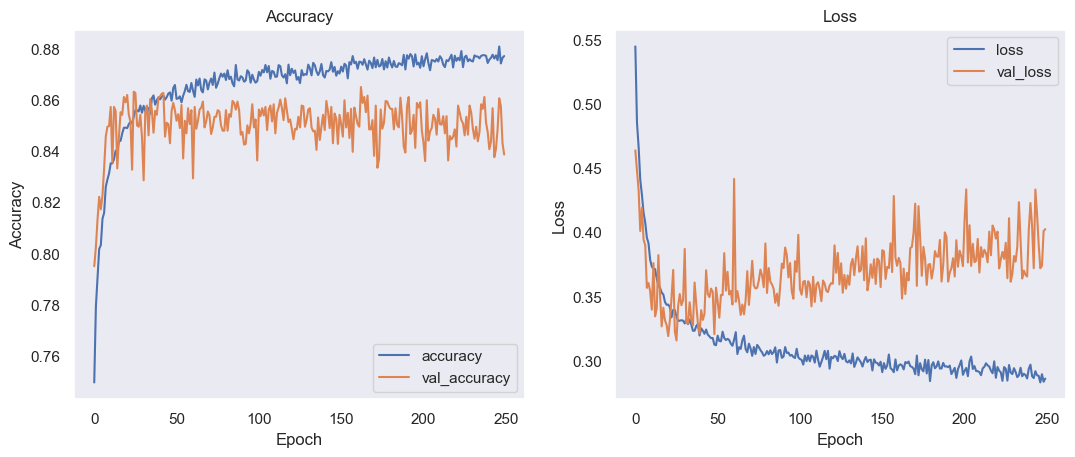

In [107]:
# Defining ANN architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='tanh', input_dim=input_shape)) 
model.add(tf.keras.layers.Dense(256, activation='tanh')) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(classes, activation='softmax')) 
# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback function to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.90) and (logs.get('accuracy')>0.95):
            print("\nValidation and training accuracies are high so cancelling training!")
            self.model.stop_training = True

# Stopping early to avoid overfitting
stop_callback = myCallback()
# Training
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[stop_callback])
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')          # Train loss (blue)
plt.plot(history.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

In [108]:
# Evaluating the model on test data
test_loss_ann_1, test_accuracy_ann_1 = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_loss_ann_1)
print('Test Accuracy:', test_accuracy_ann_1)
# Saving the model to a file
model.save('ANN1.h5')

Test Loss: 0.40244972705841064
Test Accuracy: 0.8386182188987732


- NEURAL NETWORK 2: 32-64-512 ANN with 'relu'

Epoch 1/250
485/485 [==============================] - 2s 3ms/step - loss: 0.7857 - accuracy: 0.6467 - val_loss: 0.6410 - val_accuracy: 0.7079
Epoch 2/250
485/485 [==============================] - 1s 2ms/step - loss: 0.5989 - accuracy: 0.7377 - val_loss: 0.5393 - val_accuracy: 0.7670
Epoch 3/250
485/485 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.7670 - val_loss: 0.4987 - val_accuracy: 0.7842
Epoch 4/250
485/485 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.7805 - val_loss: 0.4739 - val_accuracy: 0.7891
Epoch 5/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4805 - accuracy: 0.7862 - val_loss: 0.4599 - val_accuracy: 0.8023
Epoch 6/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4660 - accuracy: 0.7943 - val_loss: 0.4446 - val_accuracy: 0.8030
Epoch 7/250
485/485 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.7985 - val_loss: 0.4357 - val_accuracy: 0.8072

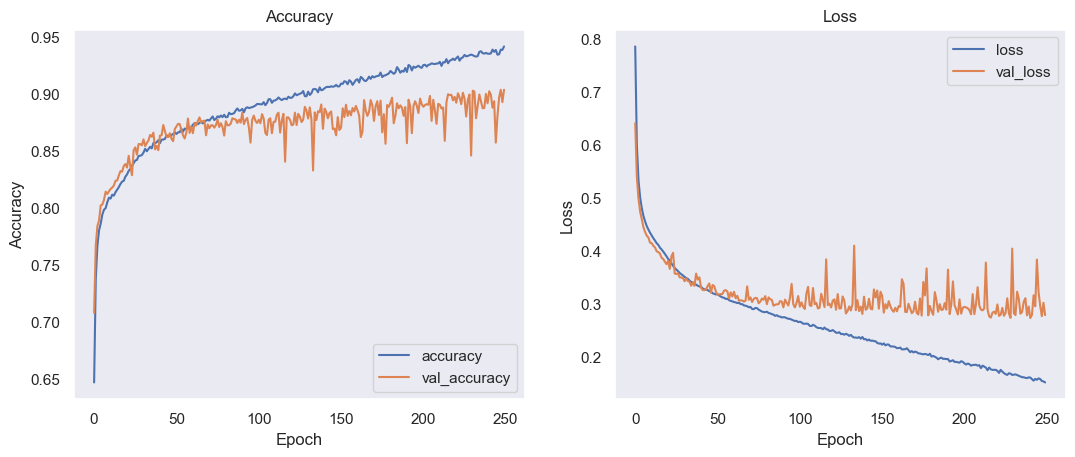

In [109]:
# Defining ANN architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(classes, activation='softmax')) 
# Model Compilation
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback function to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.90) and (logs.get('accuracy')>0.95):
            print("\nValidation and training accuracies are high so cancelling training!")
            self.model.stop_training = True

# Stopping early to avoid overfitting
stop_callback = myCallback()
# Training
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[stop_callback])
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')          # Train loss (blue)
plt.plot(history.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

In [110]:
# Evaluating the model on test data
test_loss_ann_2, test_accuracy_ann_2 = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_loss_ann_2)
print('Test Accuracy:', test_accuracy_ann_2)
# Saving the model to a file
model.save('ANN2.h5')

Test Loss: 0.2789194583892822
Test Accuracy: 0.9038411974906921


- NEURAL NETWORK 3: 32-1024 ANN with 'sigmoid'

Epoch 1/250
485/485 [==============================] - 3s 3ms/step - loss: 0.5828 - accuracy: 0.7412 - val_loss: 0.5204 - val_accuracy: 0.7744
Epoch 2/250
485/485 [==============================] - 1s 3ms/step - loss: 0.4784 - accuracy: 0.7833 - val_loss: 0.4453 - val_accuracy: 0.8007
Epoch 3/250
485/485 [==============================] - 1s 3ms/step - loss: 0.4565 - accuracy: 0.7921 - val_loss: 0.4464 - val_accuracy: 0.8018
Epoch 4/250
485/485 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.7953 - val_loss: 0.4119 - val_accuracy: 0.8206
Epoch 5/250
485/485 [==============================] - 1s 3ms/step - loss: 0.4291 - accuracy: 0.8074 - val_loss: 0.3915 - val_accuracy: 0.8322
Epoch 6/250
485/485 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8147 - val_loss: 0.3693 - val_accuracy: 0.8404
Epoch 7/250
485/485 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8231 - val_loss: 0.3711 - val_accuracy: 0.8324

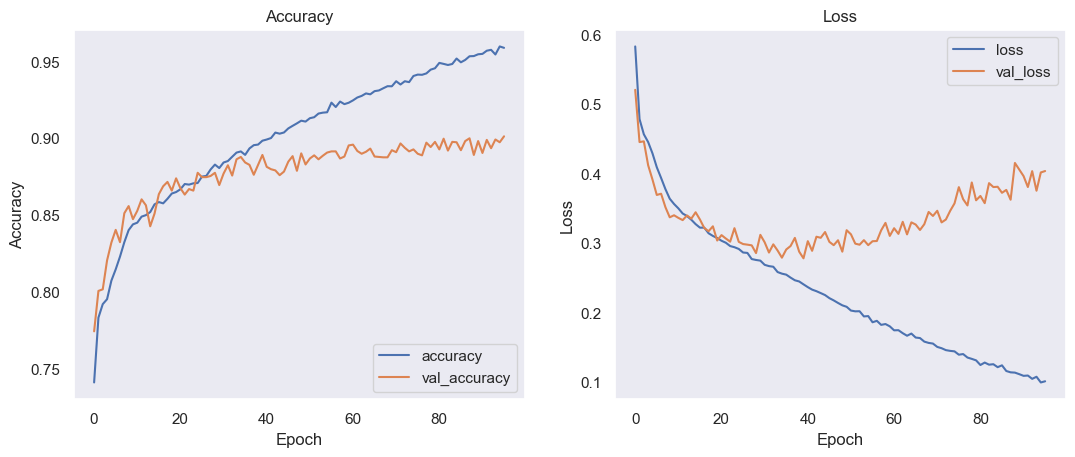

In [111]:
# Defining ANN architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='sigmoid', input_dim=input_shape)) 
model.add(tf.keras.layers.Dense(1024, activation='sigmoid')) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(classes, activation='softmax')) 
# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback function to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.90) and (logs.get('accuracy')>0.95):
            print("\nValidation and training accuracies are high so cancelling training!")
            self.model.stop_training = True

# Stopping early to avoid overfitting
stop_callback = myCallback()
# Training
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[stop_callback])
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')          # Train loss (blue)
plt.plot(history.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

In [112]:
# Evaluating the model on test data
test_loss_ann_3, test_accuracy_ann_3 = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_loss_ann_3)
print('Test Accuracy:', test_accuracy_ann_3)
# Saving the model to a file
model.save('ANN3.h5')

Test Loss: 0.4036797285079956
Test Accuracy: 0.9012632369995117


In [113]:
# Results of All three variants of ANN
print(
    "Below are the performances of three variants of Deep Learning Algorithms on 250 Epochs"
)
performance_table = pd.DataFrame(
    {
        "Algorithms": [
            "16-256 ANN with 'tanh'",
            "32-64-512 ANN with 'relu'",
            "32-1024 ANN with 'sigmoid'",
        ],
        "Activation Functions": ["tanh", "relu", "sigmoid"],
        "Optimizers": ["Adam", "SGD", "Nadam"],
        "Accuray": [
            round(test_accuracy_ann_1, 3),
            round(test_accuracy_ann_2, 3),
            round(test_accuracy_ann_3, 3),
        ],
        "Loss": [
            round(test_loss_ann_1, 3),
            round(test_loss_ann_2, 3),
            round(test_loss_ann_3, 3),
        ],
    }
)
performance_table

Below are the performances of three variants of Deep Learning Algorithms on 250 Epochs


,Algorithms,Activation Functions,Optimizers,Accuray,Loss
0,16-256 ANN with 'tanh',tanh,Adam,0.839,0.402
1,32-64-512 ANN with 'relu',relu,SGD,0.904,0.279
2,32-1024 ANN with 'sigmoid',sigmoid,Nadam,0.901,0.404
